In [5]:
##################################
###  Version mir widget hide   ###
##################################

import tkinter as tk
from tkinter import messagebox
import numpy as np

datum = [0,0,0,0,0]    # Tag, Monat, Jahr, Schaltjahr,Tage
x = 450
y = 700
root = tk.Tk()
root.geometry(f"{x}x{y}")
root.title('Jahreszahl abfragen')

v1 = tk.IntVar()        # Variable für Jahr
v1.set(2023)
myMon = tk.IntVar()     # tkinter-Variable vom Typ IntVar für Monat
myMon.set(0)            # Initialisieren der Auswahl Monat (versteckt)
myDay = tk.IntVar()     # Variable für den Tag
months = [
    ("Januar", 1),
    ("Februar", 2),
    ("März", 3),
    ("April", 4),
    ("Mai", 5),
    ("Juni", 6),
    ("Juli", 7),
    ("August", 8),
    ("September", 9),
    ("Oktober", 10),
    ("November", 11),
    ("Dezember", 12),
]
wt = ['Sonntag','Montag','Dienstag','Mittwoch','Donnerstag','Freitag','Samstag']
rb_list = []            # Liste für Tagesauswahl

def ShowChoice():       # Auswahl des Monats
    datum[1] = months[myMon.get()-1][1]
    checkDays(datum[1])
    makeDays(datum[4])
    message = update_wt(datum)

def checkDays(d):
    if d in [1, 3, 5, 7, 8, 10, 12]: days = 31
    elif d in [4, 6, 9, 11]: days = 30
    else:
        if datum[3] == 1: days = 29
        else: days = 28
    datum[4] = days
    if datum[0] > datum[4]:    # Datum, nach Änderung, nicht mehr gültig
        res = messagebox.showinfo("Info", f"Das gewählte Datum {datum[0]:02d}.{datum[1]:02d}.{datum[2]} ist ungültig\nBitte korrigieren Sie den Tag.")
        datum[0] = 0
        
def show1():            # Auswahl des Jahrs
    datum[2] = int(v1.get())
    if datum[2]%4==0 and (datum[2]%400==0 or not datum[2]%100==0):datum[3] = 1 # Schaltjahr
    else:datum[3] = 0
    if datum[1] > 0:
        checkDays(datum[1])
        makeDays(datum[4])
    message = update_wt(datum)

def ShowDay():          # Auswahl des Tages
    datum[0] = myDay.get()
    message = update_wt(datum)

def makeDays(d):
    global rb_list
    if not rb_list:                    # Wenn keine RadioButtons vorhanden (beim ersten mal)
        for day in range(1, 32):
                rb = tk.Radiobutton(f,
                               text = day,
                               variable = myDay,
                               #indicatoron=1,            # runde Auswahl
                               indicatoron = 0,          # rechteckige Auswahl
                               command = ShowDay,
                               value=day)
                rb.grid(row = 20 + (day - 1)//3, column = (day-1)%3, sticky="nsew")  # 3 Buttons pro Zeile
                rb_list.append(rb)    
    for day in range(28, 31):                 # Buttons aus- oder einblenden (nur die variablen Tage)
        if day < d: rb_list[day].grid()       # widget einblenden
        else: rb_list[day].grid_remove()      # widget ausblenden
    message = update_wt(datum)

def Wochentag(d, m, cy):
    if m < 3:        # Monat Januar oder Februar
        m = m + 10   # Korrektur Monat für julianischen Kalender
        cy -= 1      # Korrektur Jahr 
        
    else: m = m - 2
    y = cy%100      # Jahreszahl
    c = cy//100     # Jahrhundert
    # Berechnung des Wochentages
    w = (d + np.floor((2.6 * m) - 0.2) + y + np.floor(y/4) + np.floor(c/4) - 2 * c) % 7
    return int(w)
    
def update_wt(dat):
    if dat[0] > 0 and dat[1] > 0 and dat[2] > 0:
        sel = f"Wochentag    : {wt[Wochentag(dat[0], dat[1], dat[2])]}"  # Berechnung Wochentag wenn möglich
        sel_kw = f"Kalenderwoche: {KW_Info(dat[0], dat[1], dat[2])}"
        sel_datum = f"Datum        : {dat[0]}.{dat[1]}.{dat[2]}"
    else:
        sel =       'Wochentag    : '
        sel_kw =    'Kalenderwoche: '
        sel_datum = 'Datum        : '
    l5.config(text = sel, font = ("Courier", 14)) # Aktualisierung Wochentag
    l6.config(text = sel_kw, font = ("Courier", 14)) # Aktualisierung Kalenderwoche
    l1.config(text = sel_datum, font = ("Courier", 14)) # Aktualisierung Kalenderwoche

def scale_use(event):  # Event zum Löschen der Infoleiste
    update_wt([0,0,0])

def KW_Info(tag, monat, jahr):
    status = [0,0,0,0]                              # Wochentag 1.1.jahr, Offset KW1, Tag des Jahres, Kalenderwoche
    status[0] = Wochentag(1,1,jahr)
    if status[0] <= 4:                              # Wann startet der Montag in KW 1 ?
        status[1] = status[0] - 2                   # Offset für die erste oder 53. Kalenderwoche.
    else:
        status[1] = status[0] - 9                   # Offset für ein normales Jahr mit 52 Wochen
    status[2] = Tag_des_Jahres(tag, monat, jahr)    # Anzahl der Tage des Jahres
    status[3] = ((status[1] + status[2]) //7) + 1   # Berechnung der Kalenderwoche = offset + Tage ab 1.1. // 7 
                                                    # + 1, da erste Woche mit 0 berechnet! 
    if status[3] == 53 :                            # Prüfung 53 KW oder 1 KW des folgejahres
        if Wochentag(1,1,jahr+1) <= 4:              # beginnt das nächste Jahr zwischen Montag und Donnerstag?
            status[3] = 1                           # Kalenderwoche 1 beginnt im alten Jahr
    if status[3] == 0 :
        if Wochentag(1,1,jahr - 1) <= 4:            # beginnt das nächste Jahr zwischen Montag und Donnerstag?
            status[3] = 1
        else:
            status[3] = 53
    return status[3]

def Tag_des_Jahres(tag,monat,jahr):
    monatstage = [31,28,31,30,31,30,31,31,30,31,30,31]
    monatstage[1]  += int(jahr%4==0 and (jahr%400==0 or not jahr%100==0)) # 29 Tage im Schaltjahr
    return sum(monatstage[0:monat -1]) + tag   # Anzahl der Tage inkl. Enddatum

###############    
### M A I N ###
###############

f = tk.Frame(root)
f.grid(sticky="nsew")
s1 = tk.Scale(f, variable = v1,
           from_ = 1600, to = 2100,
           orient = tk.HORIZONTAL,
           tickinterval = 100, length = x)   
            
s1.grid(row = 1, column = 0, columnspan = 5, sticky=tk.E + tk.W + tk.N + tk.S)
s1.bind("<ButtonRelease>", scale_use)
b1 = tk.Button(f, text ="Übernehmen", 
           command = show1, 
           bg = "lime",
           pady = 5)  
b1.grid(row = 5, column = 0, columnspan = 5)

for month in months:                           # Auswahl des Monats
    tk.Radiobutton(f,
                   text = month[0],
                   variable = myMon,
                   #indicatoron=1,            # runde Auswahl
                   indicatoron = 0,          # rechteckige Auswahl
                   command = ShowChoice,
                   value=month[1]).grid(row = 10 + (month[1] - 1)//3,
                                       column = (month[1]-1)%3,
                                       sticky="nsew") 

b2 = tk.Button(root, text="Fertig (ENDE)", command=root.destroy, bg = 'orange')
b2.grid(row = 40, column = 0, sticky = 'nwse', padx = x / 10, pady = x / 20)
l1 = tk.Label(f, text = 'Datum        : ', font = ("Courier", 14))
l1.grid(row = 55, column = 1, columnspan = 5, sticky = 'w') 
l2 = tk.Label(f, text = 'Jahreszahl', font = ("Courier", 14) )
l2.grid(row = 0, column = 0, columnspan = 5)
l3 = tk.Label(f, text = 'Monat', font = ("Courier", 14) )
l3.grid(row = 6, column = 0, columnspan = 5)
l4 = tk.Label(f, text = 'Tag', font = ("Courier", 14) )
l4.grid(row = 15, column = 0, columnspan = 5)
l5 = tk.Label(f, text = 'Wochentag    : ', font = ("Courier", 14) )
l5.grid(row = 45, column = 1, columnspan = 5, sticky = 'w')
l6 = tk.Label(f, text = 'Kalenderwoche: ', font = ("Courier", 14) )
l6.grid(row = 50, column = 1, columnspan = 5, sticky = 'w')

root.mainloop()

# Zählweise nach ISO 8601
Die Kalenderwoche ist nach ISO 8601 so definiert:

Kalenderwochen haben 7 Tage, beginnen an einem Montag und werden über das Jahr fortlaufend nummeriert.
Die Kalenderwoche 1 eines Jahres ist diejenige, die den ersten Donnerstag des Jahres enthält.
Weitere Eigenschaften dieser Zählweise sind:

Jedes Jahr hat entweder 52 oder 53 Kalenderwochen.
Ein Jahr hat genau dann 53 Kalenderwochen, wenn es mit einem Donnerstag beginnt oder endet:
Ein Gemeinjahr mit 53 Wochen beginnt an einem Donnerstag und endet an einem Donnerstag.
Ein Schaltjahr mit 53 Wochen beginnt entweder an einem Mittwoch und endet an einem Donnerstag oder es beginnt an einem Donnerstag und endet an einem Freitag.
Der 29., 30. und 31. Dezember können schon zur Kalenderwoche 1 des Folgejahres gehören.
Der 1., 2. und 3. Januar können noch zu der letzten Kalenderwoche des Vorjahres gehören.
Der 4. Januar ist immer in Kalenderwoche 1.

In [ ]:
def KW_Info(tag, monat, jahr):
    status = [0,0,0,0]                              # Wochentag 1.1.jahr, Offset KW1, Tag des Jahres, Kalenderwoche
    status[0] = Wochentag(1,1,jahr)
    if status[0] <= 4:                              # Wann startet der Montag in KW 1 ?
        status[1] = status[0] - 2                   # Offset für die erste oder 53. Kalenderwoche.
    else:
        status[1] = status[0] - 9                   # Offset für ein normales Jahr mit 52 Wochen
    status[2] = Tag_des_Jahres(tag, monat, jahr)    # Anzahl der Tage des Jahres
    status[3] = ((status[1] + status[2]) //7) + 1   # Berechnung der Kalenderwoche = offset + Tage ab 1.1. // 7 
                                                    # + 1, da erste Woche mit 0 berechnet! 
    if status[3] == 53 :                            # Prüfung 53 KW oder 1 KW des folgejahres
        if Wochentag(1,1,jahr+1) <= 4:              # beginnt das nächste Jahr zwischen Montag und Donnerstag?
            status[3] = 1                           # Kalenderwoche 1 beginnt im alten Jahr
    if status[3] == 0 :
        if Wochentag(1,1,jahr - 1) <= 4:            # beginnt das nächste Jahr zwischen Montag und Donnerstag?
            status[3] = 1
        else:
            status[3] = 53
    return status[3]

In [ ]:
def Tag_des_Jahres(tag,monat,jahr):
    monatstage = [31,28,31,30,31,30,31,31,30,31,30,31]
    monatstage[1]  += int(jahr%4==0 and (jahr%400==0 or not jahr%100==0)) # 29 Tage im Schaltjahr
    return sum(monatstage[0:monat -1]) + tag   # Anzahl der Tage inkl. Enddatum

Tag_des_Jahres(11,4,2000)

In [ ]:
def Wochentag(d, m, cy):
    wt = ['Sonntag','Montag','Dienstag','Mittwoch','Donnerstag','Freitag','Samstag']
    if m < 3:        # Monat Januar oder Februar
        m = m + 10   # Korrektur Monat für julianischen Kalender
        cy -= 1      # Korrektur Jahr 
        
    else: m = m - 2
    y = cy%100      # Jahreszahl
    c = cy//100     # Jahrhundert
    # Berechnungdes Wochentages
    w = (d + np.floor((2.6 * m) - 0.2) + y + np.floor(y/4) + np.floor(c/4) - 2 * c) % 7
    print(f'Wochentag = {wt[int(w)]} ({int(w)})')  # Ausgabe
    return int(w)

In [ ]:
# Testen
Wochentag(21, 7, 1969)  # Mondlandung        (Montag)
Wochentag(11, 4, 1966)  #                    (Montag)
Wochentag(1, 1, 2000)   # Jahr 2000          (Samstag)
Wochentag(3, 10, 1990)  # Deutsche Einheit   (Mittwoch)
Wochentag(28, 8, 1749)  # Geburtstag Goethe  (Donnerstag)
Wochentag(29, 5, 1917)  # John F. Kennedy    (Dienstag)
Wochentag(14, 3, 1879)  # Albert Einstein    (Freitag)
Wochentag(10, 11, 1759) # Friedrich Schiller (Samstag)
Wochentag(12,2,1809)    # Abraham Lincoln    (Sonntag)
'''
Wochentag = Montag (1)
Wochentag = Montag (1)
Wochentag = Samstag (6)
Wochentag = Mittwoch (3)
Wochentag = Donnerstag (4)
Wochentag = Dienstag (2)
Wochentag = Freitag (5)
Wochentag = Samstag (6)
Wochentag = Sonntag (0)
'''
None

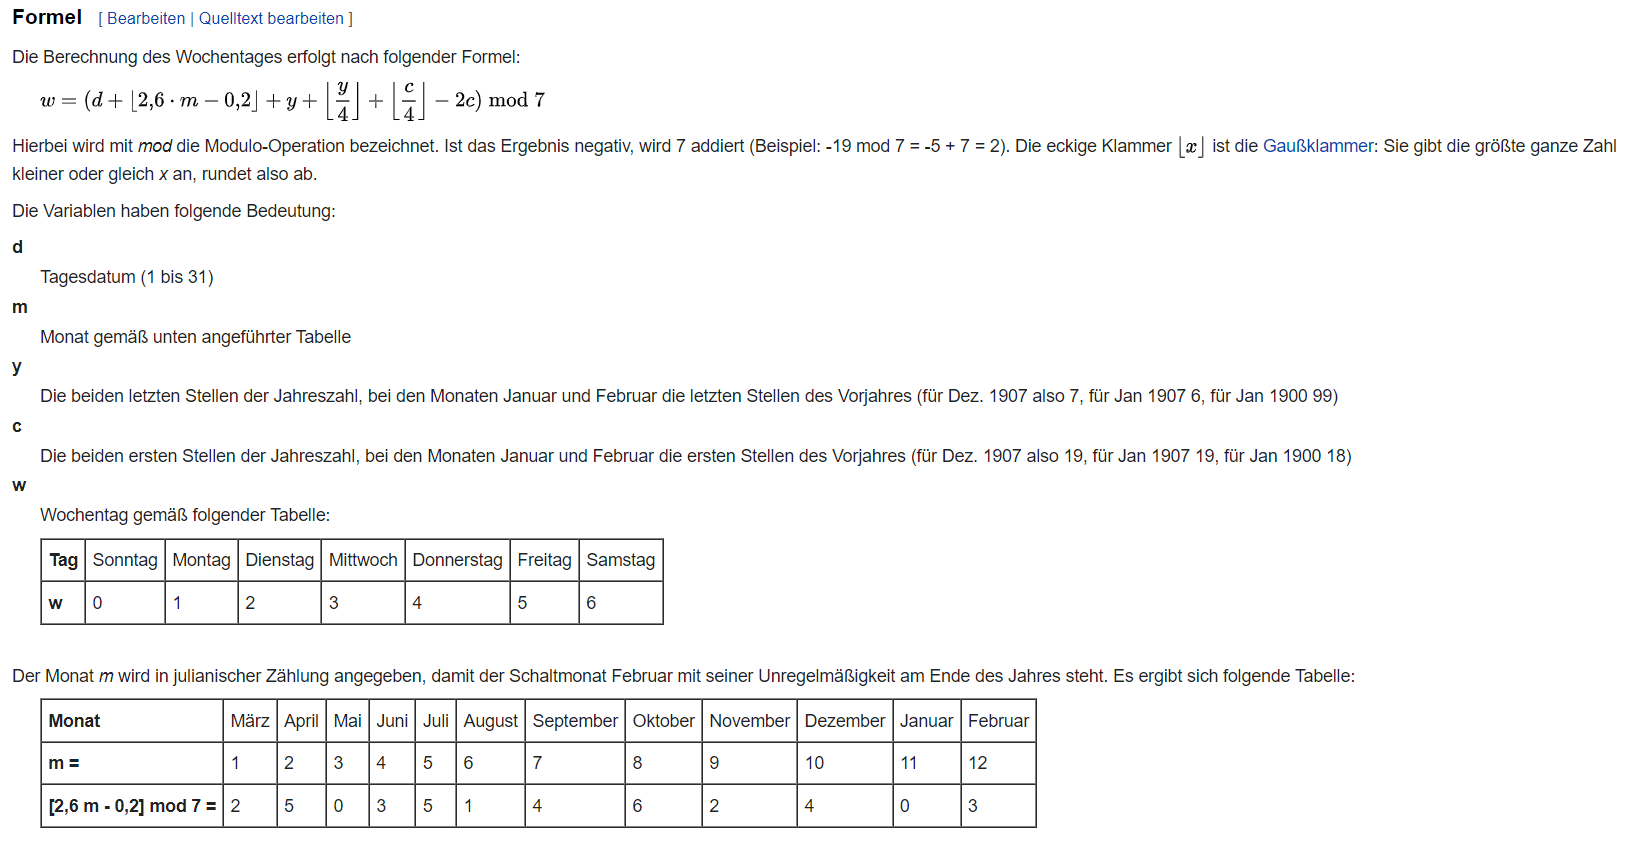